# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [92]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

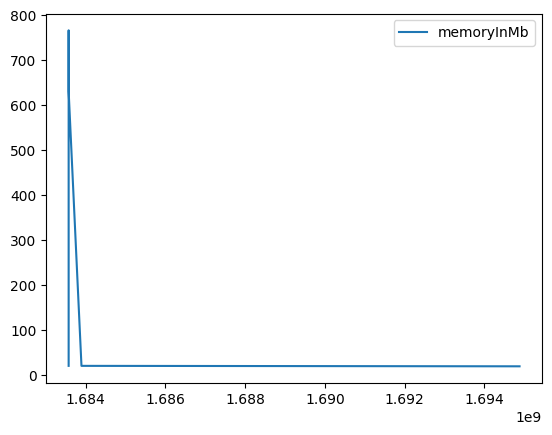

In [93]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

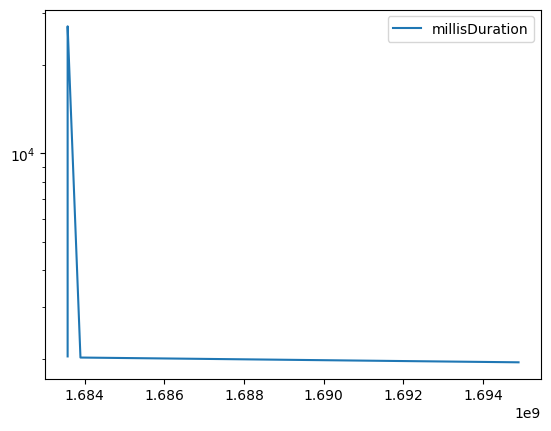

In [94]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [95]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

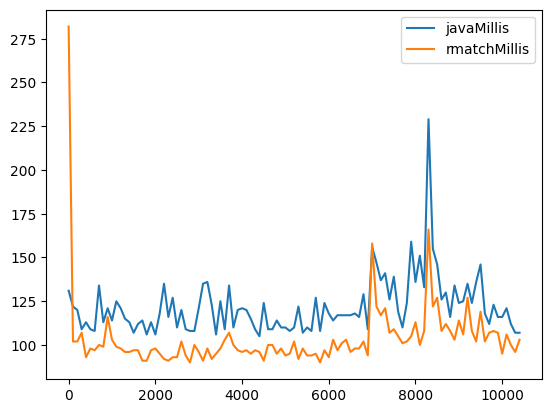

In [96]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

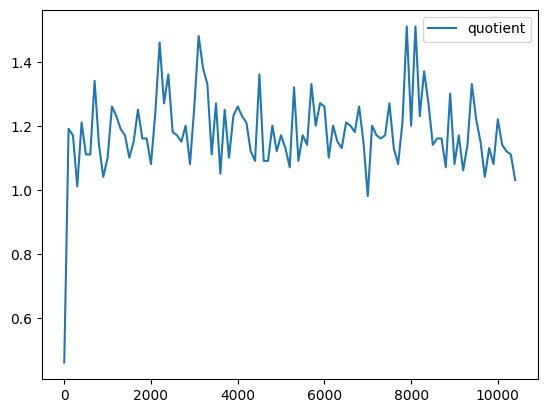

In [97]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [98]:
df[" quotient"].std()

0.12511474586834134

In [99]:
df[" quotient"].mean()

1.181047619047619

In [100]:
df[" javaMillis"].std()

16.22013739593032

In [101]:
df[" javaMillis"].mean()

121.65714285714286

In [102]:
df[" regexMillis"].std()

21.037869221761536

In [103]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [104]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [105]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1695575996695,7bb391a5-2f39-4e45-bbb3-c812e251f1c2,master,rmatch,3244,222493,java,409,20023,657323,12,19566,662077,11.111872
172,1695578259490,bed0c449-1742-48f5-b5e4-3fe421ba43f3,master,rmatch,1222,161874,java,245,11678,318135,339188,19566,662077,13.861449
173,1695591108293,79cae25a-affe-41af-8d98-654cb5149ee3,master,rmatch,2115,238636,java,413,47162,657323,12,19566,662077,5.059921
174,1695592582360,0c2e04cf-451a-41ed-ab2c-0c9e9328663c,master,rmatch,2747,253478,java,406,6414,657323,12,19566,662077,39.519490


In [106]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [107]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1695575996695,7bb391a5-2f39-4e45-bbb3-c812e251f1c2,master,rmatch,3244,222493,java,409,20023,657323,12,19566,662077,11.111872,5.822295e+04,6.469659e+05,11.111871
172,1695578259490,bed0c449-1742-48f5-b5e4-3fe421ba43f3,master,rmatch,1222,161874,java,245,11678,318135,339188,19566,662077,13.861449,8.002643e+04,1.109282e+06,13.861449
173,1695591108293,79cae25a-affe-41af-8d98-654cb5149ee3,master,rmatch,2115,238636,java,413,47162,657323,12,19566,662077,5.059921,5.428434e+04,2.746745e+05,5.059921
174,1695592582360,0c2e04cf-451a-41ed-ab2c-0c9e9328663c,master,rmatch,2747,253478,java,406,6414,657323,12,19566,662077,39.519490,5.110581e+04,2.019675e+06,39.519489


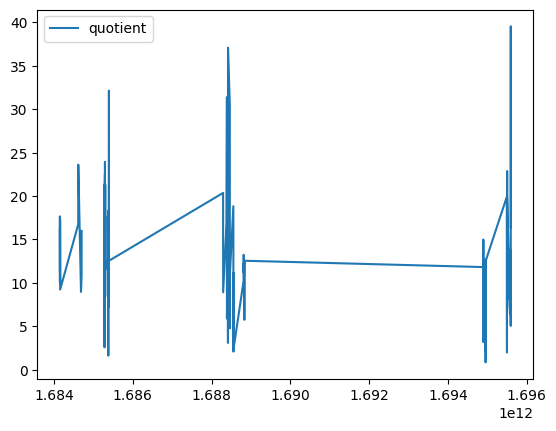

In [108]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

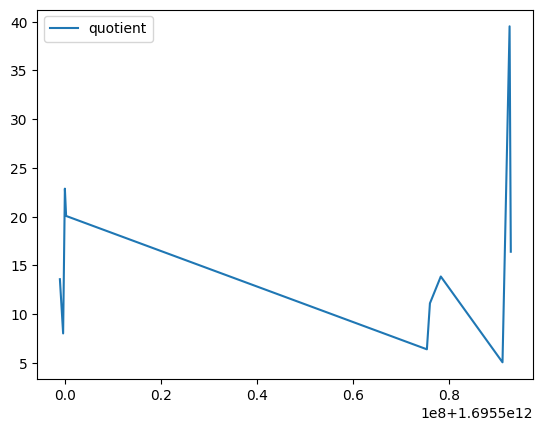

In [109]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [110]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
166,1695498945369,11cf7403-c574-4523-ab83-eff784e71e06,master,rmatch,1316,201812,java,408,14858,657323,12,19566,662077,13.582716,64189.436614,8.718669e+05,13.582716
167,1695499619109,0191bf8b-48a0-4a5d-95a0-9e7f41452a19,master,rmatch,1715,250615,java,409,31242,657323,12,19566,662077,8.021733,51689.637819,4.146405e+05,8.021734
168,1695499982839,94540fdc-e65c-4a02-ac8e-3f3297c0a6c9,master,rmatch,635,246290,java,407,10769,657323,12,19566,662077,22.870275,52597.338836,1.202916e+06,22.870276
169,1695500237614,93b4c6c8-d003-4220-a0da-f28cee4f47ce,master,rmatch,1652,162909,java,406,8117,657323,12,19566,662077,20.070099,79518.004420,1.595934e+06,20.070100
170,1695575363673,b198d2e2-4802-4acd-af92-bc38218d1e95,master,rmatch,2771,206664,java,408,32328,657323,12,19566,662077,6.392724,62682.414847,4.007114e+05,6.392725
171,1695575996695,7bb391a5-2f39-4e45-bbb3-c812e251f1c2,master,rmatch,3244,222493,java,409,20023,657323,12,19566,662077,11.111872,58222.948956,6.469659e+05,11.111871
172,1695578259490,bed0c449-1742-48f5-b5e4-3fe421ba43f3,master,rmatch,1222,161874,java,245,11678,318135,339188,19566,662077,13.861449,80026.431558,1.109282e+06,13.861449
173,1695591108293,79cae25a-affe-41af-8d98-654cb5149ee3,master,rmatch,2115,238636,java,413,47162,657323,12,19566,662077,5.059921,54284.343444,2.746745e+05,5.059921
174,1695592582360,0c2e04cf-451a-41ed-ab2c-0c9e9328663c,master,rmatch,2747,253478,java,406,6414,657323,12,19566,662077,39.519490,51105.810295,2.019675e+06,39.519489
175,1695592836207,ce299a2c-f979-4b64-953a-fc79e563c775,master,rmatch,1991,172404,java,407,10512,657323,12,19566,662077,16.400684,75138.619649,1.232325e+06,16.400685


In [111]:
import sqlite3

In [112]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
171  1695575996695  7bb391a5-2f39-4e45-bbb3-c812e251f1c2   master   
172  1695578259490  bed0c449-1742-48f5-b5e4-3fe421ba43f3   master   
173  1695591108293  79cae25a-affe-41af-8d98-654cb5149ee3   master   
174  1695592582360  0c2e04cf-451a-41ed-ab2c-0c9e9328663c   master   
175  1695592836207  ce299a2c-f979-4b64-953a-fc79e563c775   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [113]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [114]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [115]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [116]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
171  1695575996695  7bb391a5-2f39-4e45-bbb3-c812e251f1c2   master   
172  1695578259490  bed0c449-1742-48f5-b5e4-3fe421ba43f3   master   
173  1695591108293  79cae25a-affe-41af-8d98-654cb5149ee3   master   
174  1695592582360  0c2e04cf-451a-41ed-ab2c-0c9e9328663c   master   
175  1695592836207  ce299a2c-f979-4b64-953a-fc79e563c775   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [117]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [118]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexDuration',\n--       stdev(durationInMillis2) as 'stdevJavaDuration',\n--       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/6154) as 'againstBestJavaRatio',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMill

In [119]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


        timestamp                          testSeriesId   
0   1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD  \
1   1685374976474  8383FDD9-A509-4046-8F04-FD430BB07BA8   
2   1685380210149  28CC3751-BA44-4B0D-BA81-27F159A3079C   
3   1685390284561  58C63D2D-F066-415C-AE24-E045B873D387   
4   1685395218314  73EE6D74-51C3-46AD-9650-47FAD020E03E   
..            ...                                   ...   
75  1695575996695  7bb391a5-2f39-4e45-bbb3-c812e251f1c2   
76  1695578259490  bed0c449-1742-48f5-b5e4-3fe421ba43f3   
77  1695591108293  79cae25a-affe-41af-8d98-654cb5149ee3   
78  1695592582360  0c2e04cf-451a-41ed-ab2c-0c9e9328663c   
79  1695592836207  ce299a2c-f979-4b64-953a-fc79e563c775   

                              metadata  noOfMatches  noOfMismatches   
0   u/la3lma/refactoring-a-la-chatgpt2      1144409               8  \
1                               master      1144409               8   
2      u/la3lma/optimize-using-chatgtp      1144409               8   
3   u/l

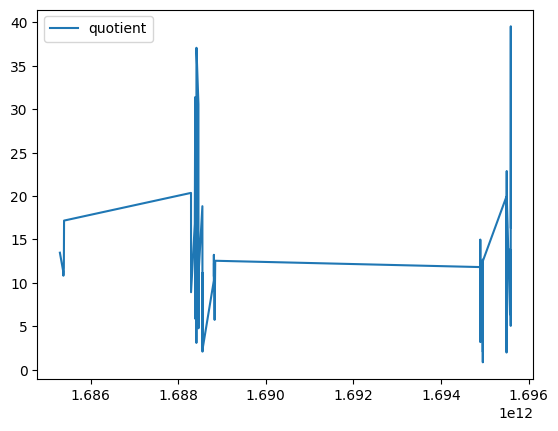

In [120]:
lastTen = r_df.iloc[-100:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()